# Proyek Analisis Data: Bike Sharing Dataset
- Nama : Dean Pratama Putra
- Email : dean_xz92@gmail.com
- id Dicoding : dean_tama

# Menentukan Pertanyaan Bisnis

1. Bagaimana tren jumlah perjalanan berbagi sepeda dalam beberapa tahun terakhir?
2. Pola penggunaan perjalanan berbagi sepeda berdasarkan waktu dalam sehari seperti apa?
3. Musim apa yang memiliki jumlah perjalanan berbagi sepeda tertinggi?
4. Apakah cuaca memengaruhi penggunaan berbagi sepeda?

# Menyiapkan Library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Data Wragling

---

# Gathering Data
Load dataset. Untuk memudahkan penggunaan dataset, saya mengunggah dataset ke GitHub.

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/deantama/dicoding-bike-sharing/main/dataset/hour.csv')

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Dataset Characteristics
---

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

# Assessing Data
---
Beberapa teknik dilakukan untuk memeriksa karakteristik data.

1. Duplicated values
2. Missing Value
3. Inaccurate values
4. dan lain-lain



## Check for Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Analisis:

- Mengubah `dteday` menjadi tipe data datetime.

- Mengubah `season`, `mnth`, `weekday` dari tipe data integer menjadi tipe data string.

## Check Missing Values

In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Analisis :
- Tidak ada missing value di dataset tersebutThere are no Missing Value in the dataset

In [5]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Analisis :

- Dari deskripsi dataset, tampaknya tidak ada data yang berada di luar batas (outliers), dan data ini sepertinya berada dalam rentang normal.

In [6]:
print(df.shape)

(17379, 17)


Analisis :

- Dataset ini memiliki 17379 baris dan 17 kolom.

# Cleaning Data

mengubah `dteday` ke data type

In [7]:
df['dteday'] =pd.to_datetime(df['dteday'])

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Memperbaiki  value of `season`, `weekday` and `month` variables

In [9]:
df['weekday'] = df['dteday'].dt.day_name()

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
df['mnth'] = df['dteday'].dt.month_name()

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
def find_season(season):
    season_string = {1:'Winter',2:'Spring',3:'Summer',4:'Fall'}
    return season_string.get(season)

season_list = []

for season in df['season']:
    season=find_season(season)
    season_list.append(season)
    
df['season'] = season_list

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Memperbaiki value `yr` variabel

In [12]:
# for 0 = 2011, 1=2012

df['yr'] = df['dteday'].dt.year

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Memperbaiki the values of `temp`,`atemp`,`hum`, and `windspeed`

In [13]:
df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['hum'] =df['hum']*100
df['windspeed']=df['windspeed']*67

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


# Exploratory Data Analysis (EDA)

In [14]:
vars = ['temp','atemp','hum','windspeed']
df_vars = df[vars]

df_vars.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


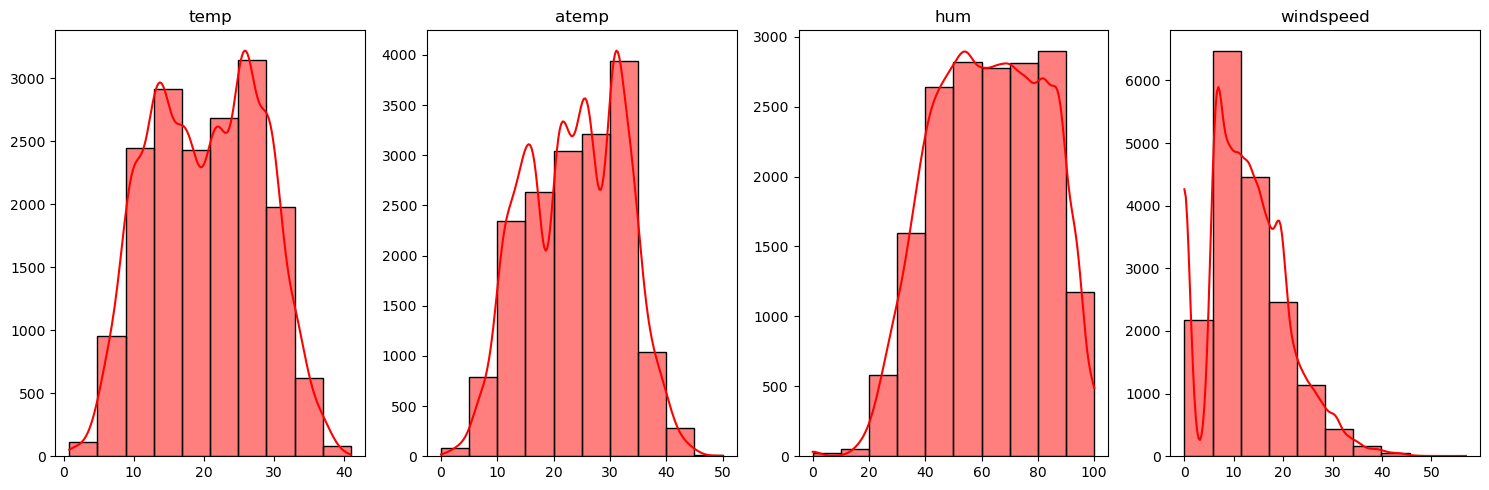

In [15]:
## Histogram

fix,axs = plt.subplots(1,4,figsize=(15,5))

for i, ax in enumerate(axs):
    sns.histplot(x=df_vars[vars[i]], ax=ax,kde=True,bins =10, color='red')
    
    ax.set_title(vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
plt.tight_layout()
plt.show()

Analisis:

- Pada variabel `windspeed`, kita melihat nilai maksimum 57 mph, dan ini abnormal.
- `temp`, `atemp`, `hum` memiliki distribusi normal.

## Jumlah pengguna casual and registered

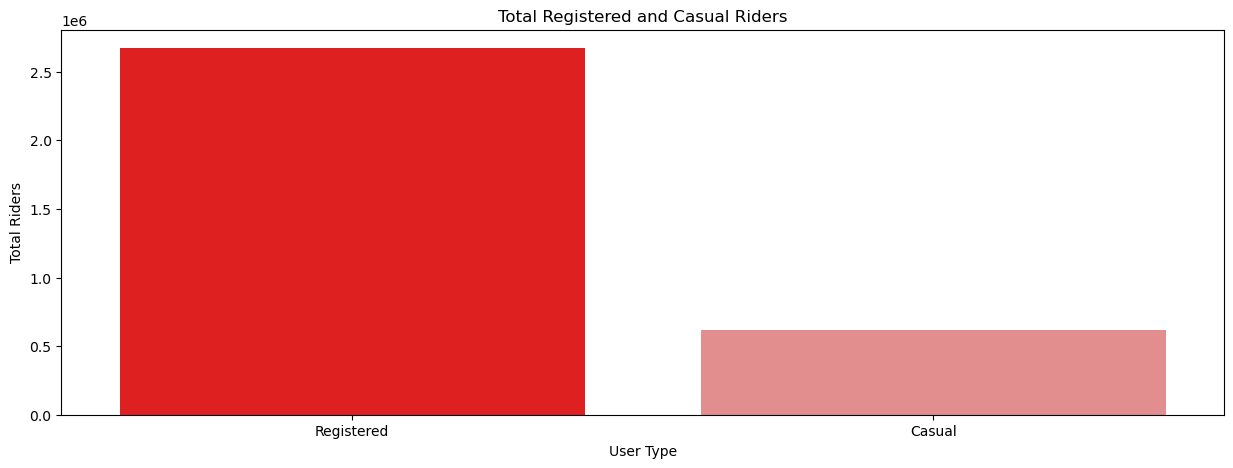

Count of registered users : 2672662
Count of casual users : 620017


In [16]:
registered_sum = df['registered'].sum()
casual_sum = df['casual'].sum()

plt.figure(figsize=(15,5))

sns.barplot(x=['Registered','Casual'], y=[registered_sum,casual_sum], palette=["red","lightcoral"])

plt.title("Total Registered and Casual Riders")
plt.xlabel("User Type")
plt.ylabel("Total Riders")

plt.show()

print("Count of registered users :",registered_sum)
print("Count of casual users :",casual_sum)

Registered bike users higher than casual users

## Pengguna Bike-share berdasarkan tahun

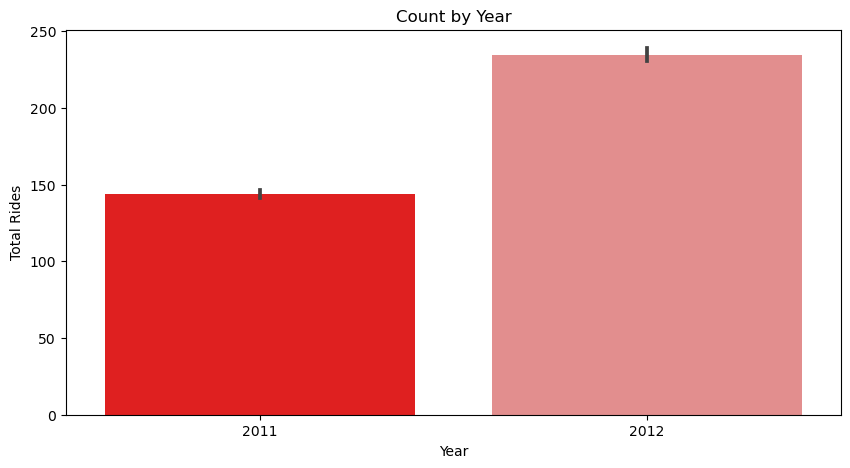

In [17]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a barplot
sns.barplot(
    x="yr",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

# Add a title
plt.title("Count by Year")

# Label the x-axis
plt.xlabel("Year")

# Label the y-axis
plt.ylabel("Total Rides")

# Show the plot
plt.show()

Analisis :

- Jumlah perjalanan berbagi sepeda pada tahun 2012 lebih tinggi daripada tahun 2011.

## 5.3 Pengguna Bikeshare bedasarkan season

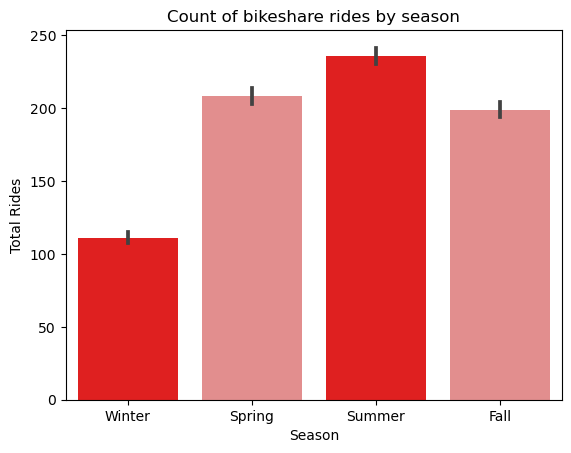

In [18]:
sns.barplot(
    x="season",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

plt.title("Count of bikeshare rides by season")
plt.xlabel("Season")
plt.ylabel("Total Rides")

plt.show()

Analisis :
- Jumlah perjalanan berbagi sepeda paling rendah terjadi di musim dingin dan paling tinggi di musim panas.

## Pengguna bikeshare berdasarkan month

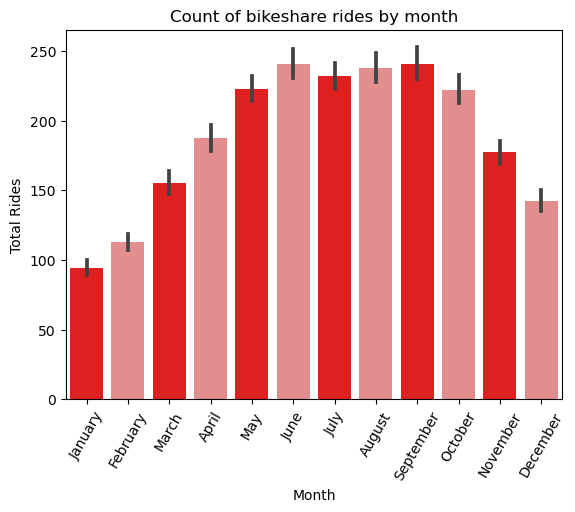

In [19]:
sns.barplot(
    x="mnth",
    y="cnt",
    data=df,
    palette=["red","lightcoral"]
)

plt.title("Count of bikeshare rides by month")
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.xticks(rotation=60)

plt.show()

Analisis :

- Jumlah perjalanan berbagi sepeda cenderung meningkat di pertengahan tahun, dan mengalami penurunan pada awal tahun (Januari dan Februari) serta pada akhir tahun (November dan Desember).

## Pengguna Bikeshare bedasarkan weekday

In [20]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

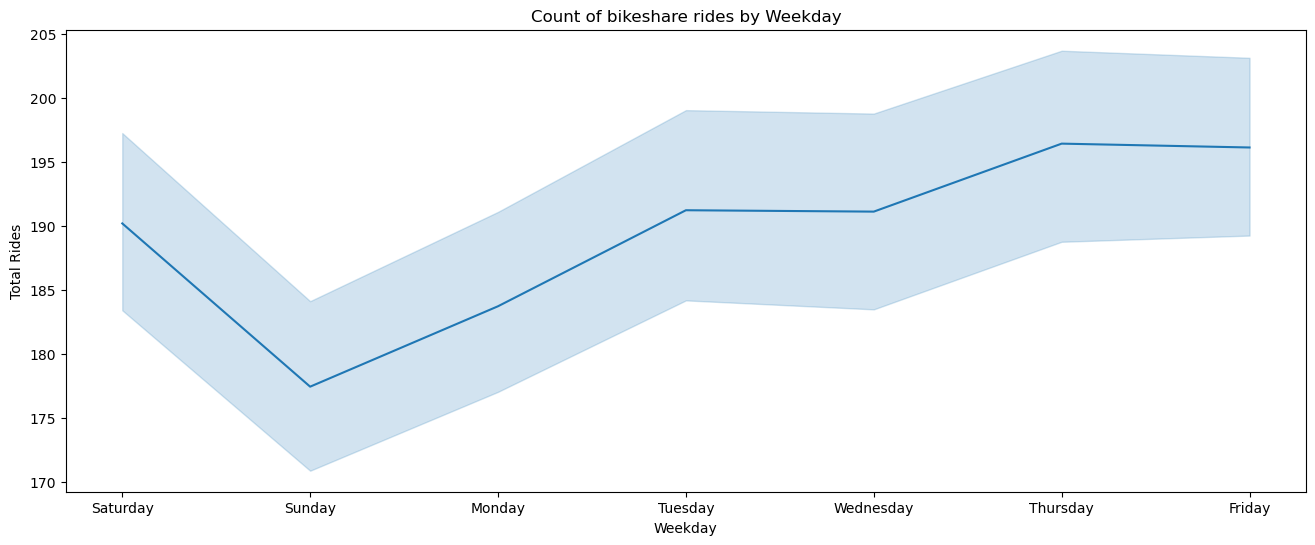

In [21]:
# Mengatur ukuran gambar (figure)
plt.figure(figsize=(16, 6))

# Membuat line plot menggunakan fungsi sns.lineplot()
sns.lineplot(
    x="weekday",
    y="cnt",
    data=df,
)

# Menambahkan label pada sumbu-sumbu dan judul pada plot
plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

# Menampilkan plot
plt.show()


## Pengguna Bikeshare bedasarkan hour

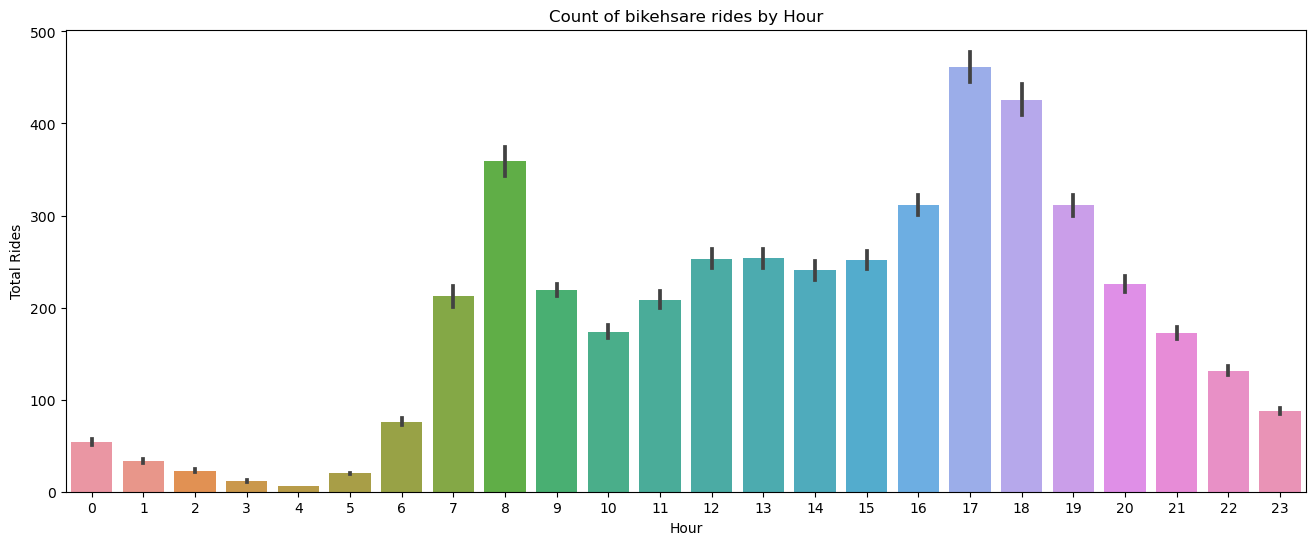

In [22]:
# Mengatur ukuran gambar (figure)
plt.figure(figsize=(16, 6))

# Membuat line plot menggunakan fungsi sns.lineplot()
sns.barplot(
    x="hr",
    y="cnt",
    data=df,
)

# Menambahkan label pada sumbu-sumbu dan judul pada plot
plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Hour")

# Menampilkan plot
plt.show()

Analisis
- tengah malah dari jam 00.00 sampai pagi jam 04.00 perjalanan sepeda paling rendah
- jumlah perjalanan pagi hari meningkat sampai puncaknya jam 08.00
- menjelang jam 09.00 perjalanan mulai menurut sampai pukul 16.00 dan mencapai puncak tertinggi di jam 17.00
- dan setelah itu mengalami penurunan sampai tengah malam

## Pengguna Bikeshare bedasarkan holiday

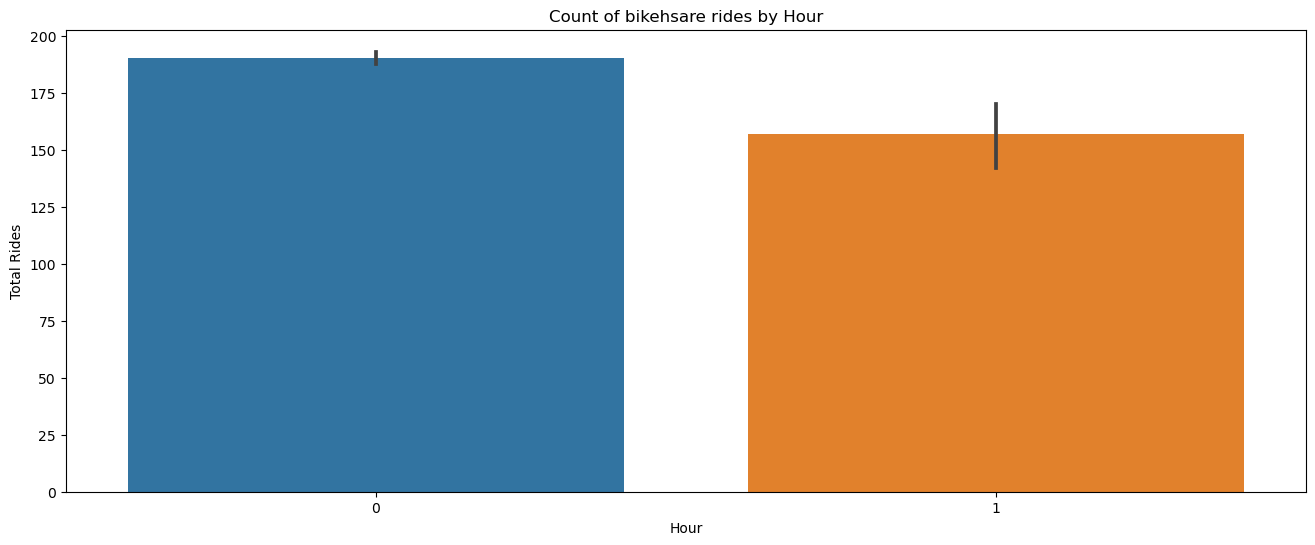

Count of bikeshare users based on working day:
1    11865
0     5514
Name: workingday, dtype: int64


In [23]:
# Mengatur ukuran gambar (figure)
plt.figure(figsize=(16, 6))

# Membuat line plot menggunakan fungsi sns.barplot()
sns.barplot(
    x="holiday",
    y="cnt",
    data=df,
)

# Menambahkan label pada sumbu-sumbu dan judul pada plot
plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Hour")

# Menampilkan plot
plt.show()

print('Count of bikeshare users based on working day:')
print(df['workingday'].value_counts())

# Visualization & Explanatory Analysis

di tahap ini akan menjawab tentang persoalan bisnis


1. Bagaimana tren jumlah perjalanan berbagi sepeda dalam beberapa tahun terakhir?
2. Pola penggunaan perjalanan berbagi sepeda berdasarkan waktu dalam sehari seperti apa?
3. Musim apa yang memiliki jumlah perjalanan berbagi sepeda tertinggi?
4. Apakah cuaca memengaruhi penggunaan berbagi sepeda?


## Bagaimana tren jumlah perjalanan berbagi sepeda dalam beberapa tahun terakhir?

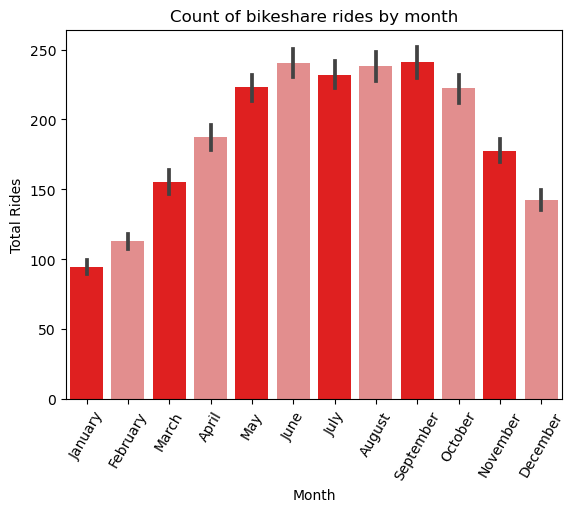

In [24]:
sns.barplot(
    x="mnth",
    y="cnt",
    data=df,
    palette=["red","lightcoral"]
)

plt.title("Count of bikeshare rides by month")
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.xticks(rotation=60)

plt.show()

In [26]:
monthly_users_df = df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_users_df.head()

,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045
2011-04-30,22346,72524,94870
2011-05-31,31050,104771,135821


In [27]:
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')

In [28]:
monthly_users_df.head()

,casual,registered,cnt
dteday,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045
Apr-11,22346,72524,94870
May-11,31050,104771,135821


In [30]:
monthly_users_df = monthly_users_df.reset_index()

In [31]:
monthly_users_df = monthly_users_df.rename(columns={'dteday': 'yearmonth'})

In [32]:
monthly_users_df.head()

,yearmonth,casual,registered,cnt
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


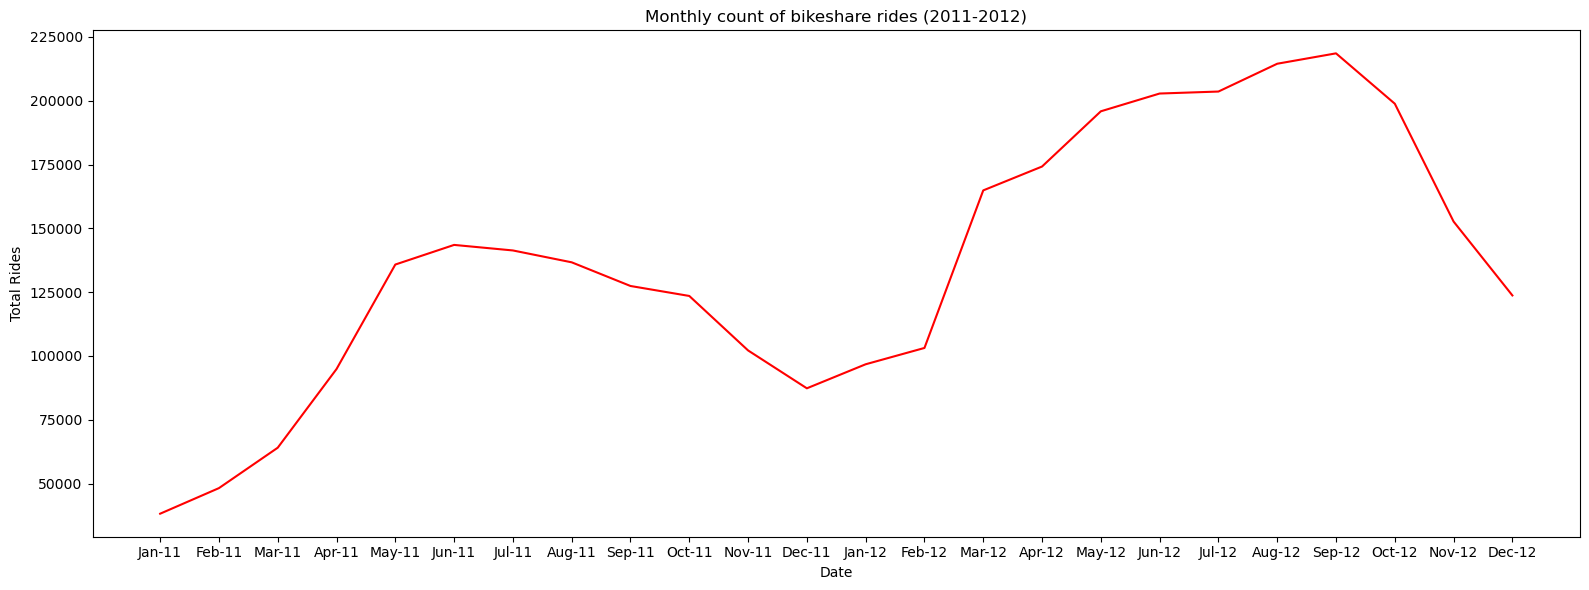

In [33]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="yearmonth", y="cnt", data=monthly_users_df, color='red')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

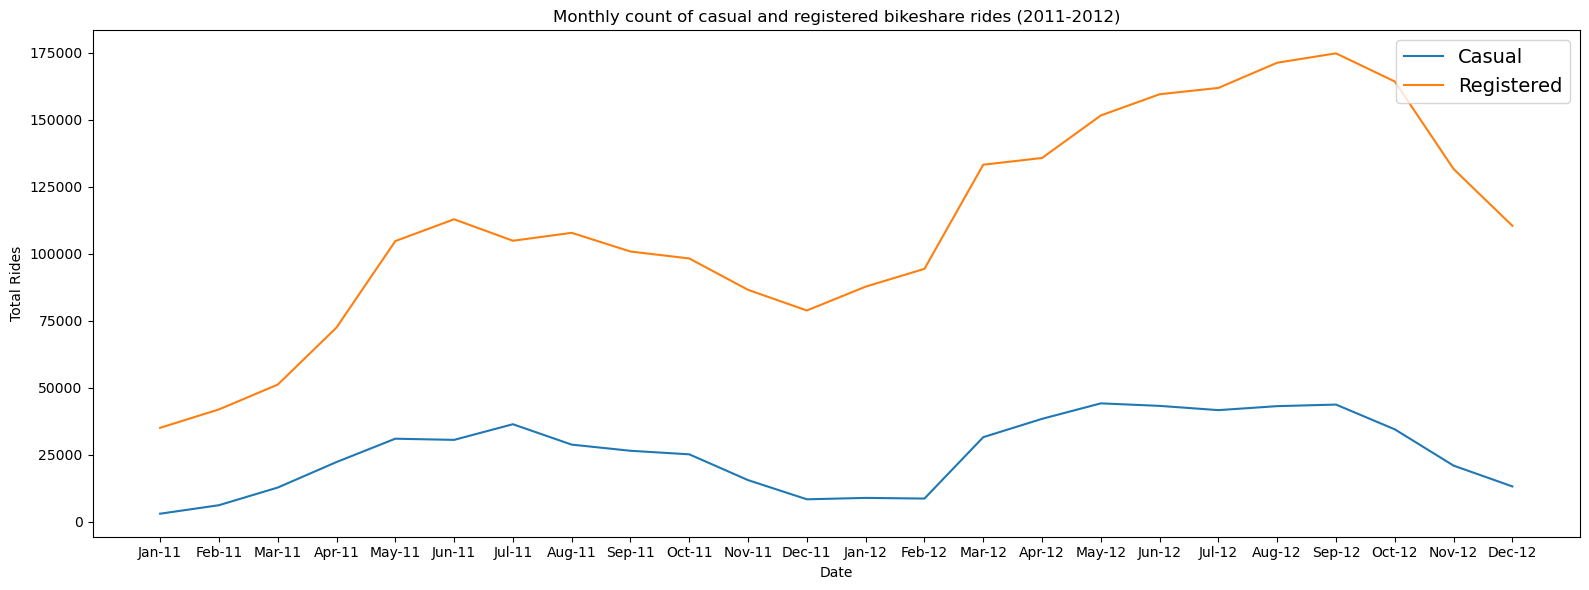

In [34]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="yearmonth", y="casual", data=monthly_users_df, label='Casual')
sns.lineplot(x="yearmonth", y="registered", data=monthly_users_df, label='Registered')

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Analisis :
1. jumlah perjalanan bersepeda pada tahun 2012 lebih tinggi dari pada 2011
2. pola musiman pada 2 tahun tersebut terlihat sama di karenakan untuk season winter (dec - maret ) mengalami penurunan dan mengalami kenaikan di season summer ( juni - september)
3. registered lebih tinggi daripada casual walaupun trend menunjukan sama selama 2 tahun terakhir

## Pola penggunaan perjalanan berbagi sepeda berdasarkan waktu dalam sehari seperti apa?

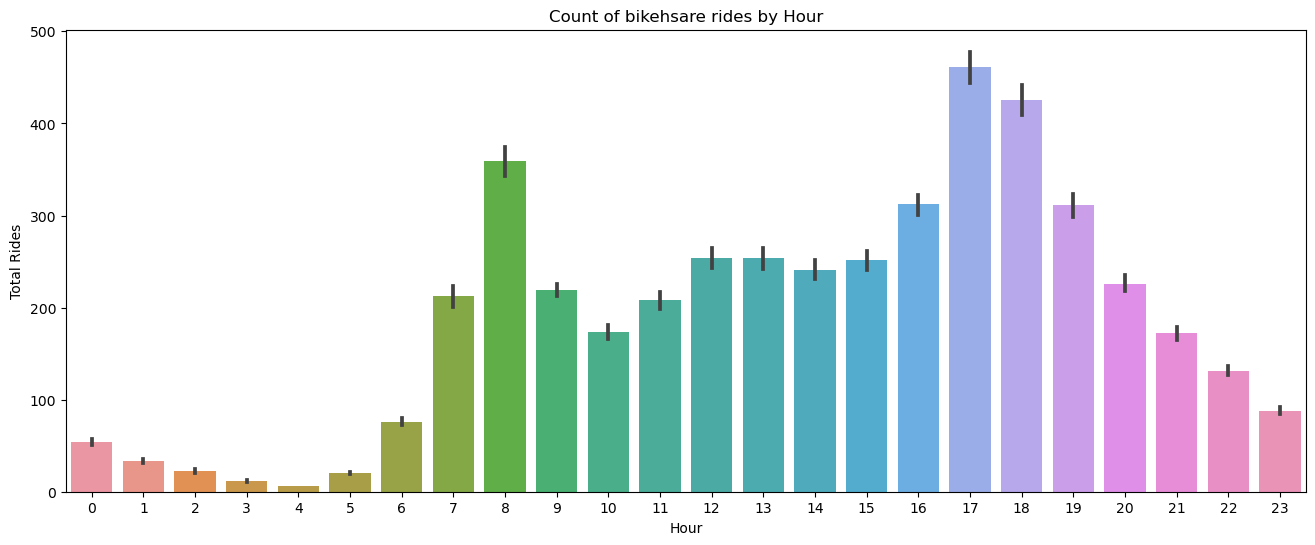

In [41]:
# Mengatur ukuran gambar (figure)
plt.figure(figsize=(16, 6))

# Membuat line plot menggunakan fungsi sns.lineplot()
sns.barplot(
    x="hr",
    y="cnt",
    data=df,
)

# Menambahkan label pada sumbu-sumbu dan judul pada plot
plt.xlabel("Hour")
plt.ylabel("Total Rides")
plt.title("Count of bikehsare rides by Hour")

# Menampilkan plot
plt.show()

Analisis :
1. tengah malah dari jam 00.00 sampai pagi jam 04.00 perjalanan sepeda paling rendah
2. jumlah perjalanan pagi hari meningkat sampai puncaknya jam 08.00
3. menjelang jam 09.00 perjalanan mulai menurut sampai pukul 16.00 dan mencapai puncak tertinggi di jam 17.00
4. dan setelah itu mengalami penurunan sampai tengah malam



##  Musim apa yang memiliki jumlah perjalanan berbagi sepeda tertinggi?

Analisis :
1. Perjalanan berbagi sepeda tertinggi terjadi selama musim panas dan terendah selama musim dingin.


In [46]:
seasonly_users_df = df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df.head()

,casual,registered,cnt
season,,,
Fall,129782,711831,841613
Spring,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


In [ ]:
sns.barplot(
    x="season",
    y="cnt",
    data=df,
    palette=["red", "lightcoral"]
)

plt.title("Count of bikeshare rides by season")
plt.xlabel("Season")
plt.ylabel("Total Rides")

plt.show()

In [48]:
seasonly_users_df = seasonly_users_df.reset_index()

In [49]:
seasonly_users_df

,index,season,casual,registered,cnt
0,0,Fall,129782,711831,841613
1,1,Spring,203522,715067,918589
2,2,Summer,226091,835038,1061129
3,3,Winter,60622,410726,471348


In [50]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

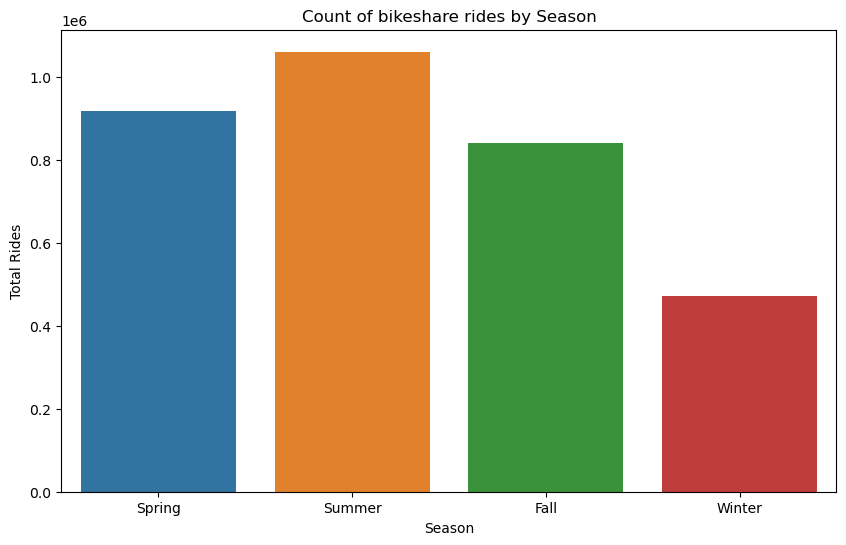

In [51]:
plt.figure(figsize=(10,6))

sns.barplot(x="season", y="cnt", data=seasonly_users_df, order=season_order)

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

Analisis :

- Jumlah Perjalanan sepeda tertinggi di musim panas (summer) dan terendah di musim dingin (winter)

In [52]:
seasonly_users_df_unpivoted = pd.melt(seasonly_users_df,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

In [53]:
seasonly_users_df_unpivoted

,season,status,count
0,Fall,casual,129782
1,Spring,casual,203522
2,Summer,casual,226091
3,Winter,casual,60622
4,Fall,registered,711831
5,Spring,registered,715067
6,Summer,registered,835038
7,Winter,registered,410726


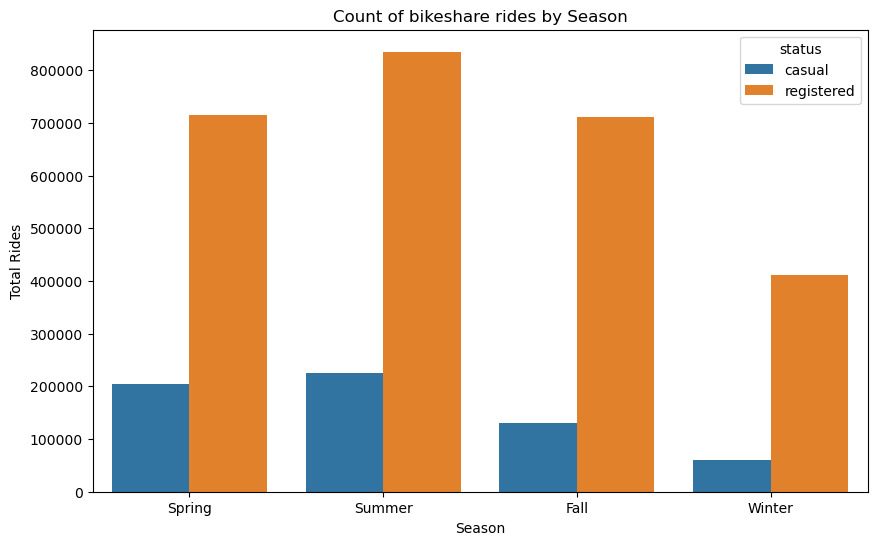

In [54]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='count', data=seasonly_users_df_unpivoted, order=season_order, hue='status')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

Analisis :
- Jumlah perjalanan bersepeda paling tinggi di musim panas (summer) dan paling rendah di musim dingin (winter)
- tidak ada perbedaan antara yang registered dan casual mengalami trend yang sama di season

# Conclusion

## Bagaimana tren jumlah perjalanan berbagi sepeda dalam beberapa tahun terakhir?

The number of bikeshare rides in 2012 was higher than in 2011. Both years showed the same trend and seasonality, with the number of rides increasing in the middle of the year and decreasing at the beginning and end of the year.

## Pola penggunaan perjalanan berbagi sepeda berdasarkan waktu dalam sehari seperti apa?

For registered users, the number of rides peaked at 8:00 AM and 5:00 PM, suggesting that they may have used the bikes to commute to work. 

## Musim apa yang memiliki jumlah perjalanan berbagi sepeda tertinggi?

Perjalanan berbagi sepeda tertinggi terjadi selama musim panas dan terendah selama musim dingin.

## Apakah cuaca memengaruhi penggunaan berbagi sepeda?

Ya, jumlah perjalanan jauh lebih tinggi saat cuaca cerah dibandingkan dengan kondisi cuaca yang lebih ekstrem.

In [55]:
df.to_csv("clean_bikeshare_hour.csv", index=False)